In [19]:
import os
from pathlib import Path
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from skimage.morphology import skeletonize, remove_small_objects
from skan.csr import skeleton_to_csgraph
from skan import Skeleton, summarize
import networkx as nx
from tqdm import tqdm


In [22]:
plant_mask_path = "/Volumes/T7/Artificial Intelligence/YEAR 2.1/Block B retake/task6/04_task6/root_3.png"
plant_mask = cv2.imread(plant_mask_path, cv2.IMREAD_GRAYSCALE)

In [23]:
blurred = cv2.GaussianBlur(plant_mask, (5, 5), 10)
normalized = cv2.normalize(blurred, None, 0, 255, cv2.NORM_MINMAX)
kernel = np.ones((3, 5), np.uint8)

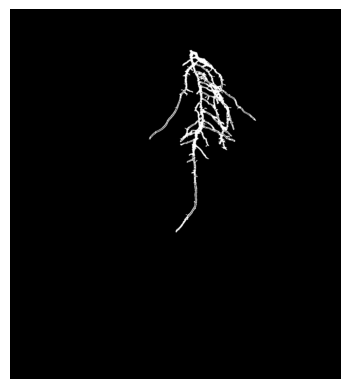

In [24]:
# Apply closing (dilate then erode)
cutout_closed = cv2.dilate(normalized, (3, 3), iterations=1)
cutout_closed = cv2.erode(cutout_closed, (3, 3), iterations=1)

plt.imshow(cutout_closed, cmap="gray")
plt.axis("off")
plt.show()

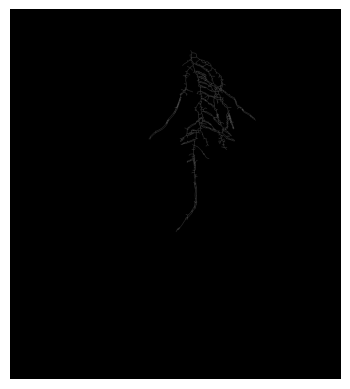

In [31]:
_, binary_image = cv2.threshold(plant_mask, 9, 255, cv2.THRESH_BINARY)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)
filtered_image = np.zeros_like(binary_image)
min_area = 200 

for i in range(1, num_labels): 
    area = stats[i, cv2.CC_STAT_AREA]
    
    if area >= min_area:
        filtered_image[labels == i] = 255 

skeleton = skeletonize(filtered_image // 255)
skeleton_image = np.uint8(skeleton) * 255
plt.imshow(skeleton_image, cmap='gray')
plt.axis('off')
plt.show()

In [26]:
# YOUR CODE HERE
# the answer without the code is almost impossible to be right thera are too many pixels, so I guess there would be between 1000 and 1500
g1, c1 = skeleton_to_csgraph(skeleton_image)
g1

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29200 stored elements and shape (14342, 14342)>

In [27]:
skeleton_object = Skeleton(skeleton_image)
branch_data = summarize(skeleton_object)
branch_data

/var/folders/51/q8610wk14l7cms9l0yvvgkkw0000gn/T/ipykernel_34997/97256251.py:2: VisibleDeprecationWarning: separator in column name will change to _ in version 0.13; to silence this warning, use `separator='-'` to maintain current behavior and use `separator='_'` to switch to the new default behavior.
  branch_data = summarize(skeleton_object)


,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,0,20,24.142136,1,255.0,0.0,337,1464,355,1476,337,1464,355,1476,21.633308
1,0,20,137,66.384776,2,255.0,0.0,355,1476,390,1515,355,1476,390,1515,52.402290
2,0,20,79,17.656854,2,255.0,0.0,355,1476,371,1472,355,1476,371,1472,16.492423
3,0,79,98,16.656854,1,255.0,0.0,371,1472,375,1457,371,1472,375,1457,15.524175
4,0,79,145,20.414214,2,255.0,0.0,371,1472,391,1471,371,1472,391,1471,20.024984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0,14266,14298,16.071068,2,255.0,0.0,1776,1378,1786,1369,1776,1378,1786,1369,13.453624
1222,0,14287,14322,18.071068,2,255.0,0.0,1784,1367,1794,1356,1784,1367,1794,1356,14.866069
1223,0,14287,14298,2.828427,2,255.0,0.0,1784,1367,1786,1369,1784,1367,1786,1369,2.828427
1224,0,14298,14322,19.242641,2,255.0,0.0,1786,1369,1794,1356,1786,1369,1794,1356,15.264338


In [28]:
G = nx.from_pandas_edgelist(branch_data, source='node-id-src', target='node-id-dst', edge_attr='branch-distance')

In [29]:
min = branch_data['node-id-src'].min()
max = branch_data['node-id-dst'].max()
path_list = nx.dijkstra_path(G, min, max, weight='branch-distance')
path_list

[0,
 20,
 79,
 145,
 193,
 207,
 315,
 395,
 619,
 773,
 1164,
 1300,
 1408,
 1575,
 1769,
 2070,
 2194,
 2319,
 2335,
 2556,
 2795,
 2995,
 3164,
 3235,
 3775,
 3836,
 4281,
 4337,
 4620,
 5009,
 5427,
 5447,
 5718,
 5849,
 6104,
 6272,
 6479,
 6589,
 6809,
 7059,
 7623,
 7837,
 7987,
 8194,
 8226,
 8584,
 8783,
 8985,
 9343,
 9365,
 9609,
 10138,
 10271,
 10609,
 10742,
 11413,
 11446,
 11712,
 11955,
 12305,
 12309,
 12382,
 12506,
 12525,
 12639,
 12660,
 12715,
 12749,
 12791,
 12811,
 12842,
 12880,
 12933,
 12972,
 13038,
 13064,
 13082,
 13100,
 13124,
 13164,
 13233,
 13235,
 13257,
 13297,
 13371,
 13376,
 13416,
 13458,
 13477,
 13534,
 13685,
 13799,
 13815,
 13838,
 13860,
 13943,
 13951,
 14003,
 14029,
 14141,
 14139,
 14190,
 14266,
 14287,
 14322,
 14341]

In [30]:
path_len = nx.dijkstra_path_length(G, min, max, weight='branch-distance')
path_len

1734.756492761105